In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import pickle

In [2]:
df = pd.read_csv('../datasets/original/dataset.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 31, 2022","23,303.4","23,634.2","24,179.3","23,236.2",138.84K,-1.40%
1,"Jul 30, 2022","23,634.2","23,774.2","24,605.3","23,521.8",168.72K,-0.59%
2,"Jul 29, 2022","23,774.3","23,850.2","24,340.0","23,451.4",221.66K,-0.32%
3,"Jul 28, 2022","23,850.0","22,957.7","24,190.5","22,611.6",268.32K,3.88%
4,"Jul 27, 2022","22,958.3","21,248.0","23,027.8","21,047.5",242.66K,8.05%


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1308 non-null   object
 1   Price     1308 non-null   object
 2   Open      1308 non-null   object
 3   High      1308 non-null   object
 4   Low       1308 non-null   object
 5   Vol.      1308 non-null   object
 6   Change %  1308 non-null   object
dtypes: object(7)
memory usage: 71.7+ KB


In [4]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1308,1308,1308,1308,1308,1308,1308
unique,1308,1305,1300,1296,1306,1255,792
top,"Mar 31, 2021","9,424.8","37,294.3","10,257.5","9,193.9",1.05M,-0.06%
freq,1,2,2,2,2,6,6


In [5]:
df.describe().T

,count,unique,top,freq
Date,1308,1308,"Mar 31, 2021",1
Price,1308,1305,"9,424.8",2
Open,1308,1300,"37,294.3",2
High,1308,1296,"10,257.5",2
Low,1308,1306,"9,193.9",2
Vol.,1308,1255,1.05M,6
Change %,1308,792,-0.06%,6


In [6]:
# NA Value
df.isna().sum() / df.shape[0]

Date        0.0
Price       0.0
Open        0.0
High        0.0
Low         0.0
Vol.        0.0
Change %    0.0
dtype: float64

In [7]:
print("Column", df.shape[1])
print("Row", df.shape[0])

Column 7
Row 1308


In [8]:
# NA Value
df.isnull().sum() / df.shape[0]

Date        0.0
Price       0.0
Open        0.0
High        0.0
Low         0.0
Vol.        0.0
Change %    0.0
dtype: float64

In [9]:
# Duplicate value
df.duplicated().sum() / len(df) * 100

0.0

In [10]:
df.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 31, 2022","23,303.4","23,634.2","24,179.3","23,236.2",138.84K,-1.40%
1,"Jul 30, 2022","23,634.2","23,774.2","24,605.3","23,521.8",168.72K,-0.59%
2,"Jul 29, 2022","23,774.3","23,850.2","24,340.0","23,451.4",221.66K,-0.32%
3,"Jul 28, 2022","23,850.0","22,957.7","24,190.5","22,611.6",268.32K,3.88%
4,"Jul 27, 2022","22,958.3","21,248.0","23,027.8","21,047.5",242.66K,8.05%


In [11]:
df.drop(['Date', 'Vol.', 'Change %'],1, inplace = True)

In [12]:
df.head()

,Price,Open,High,Low
0,"23,303.4","23,634.2","24,179.3","23,236.2"
1,"23,634.2","23,774.2","24,605.3","23,521.8"
2,"23,774.3","23,850.2","24,340.0","23,451.4"
3,"23,850.0","22,957.7","24,190.5","22,611.6"
4,"22,958.3","21,248.0","23,027.8","21,047.5"


In [13]:
# create the independent dataset

# convert the dataset into numpy array
x = np.array(df.drop(["Price"], 1))

# remove comma in every element
for key, i in enumerate(x):
  for index, j in enumerate(i):
    j = j.replace(",", "")

    j = float(j)  # convert to float
    i[index] = j  # assigned the value
  
  x[key] = i  # assign the value to the key
  
print(x)

[[23634.2 24179.3 23236.2]
 [23774.2 24605.3 23521.8]
 [23850.2 24340.0 23451.4]
 ...
 [3874.1 3875.8 3753.0]
 [3809.7 3894.8 3768.1]
 [3709.5 3814.3 3664.4]]


In [14]:
# create dependent dataset
y = np.array(df["Price"])

print(y)


['23,303.4' '23,634.2' '23,774.3' ... '3,780.1' '3,873.8' '3,809.4']


In [15]:
y = y.reshape(-1, 1)
print(y)


[['23,303.4']
 ['23,634.2']
 ['23,774.3']
 ...
 ['3,780.1']
 ['3,873.8']
 ['3,809.4']]


In [16]:
# remove comma in every element
for m in y:
  for n in m:
    n = n.replace(",", "")

    n = float(n)  # convert to float
    m[0] = n  # assigned the value
print(y)


[[23303.4]
 [23634.2]
 [23774.3]
 ...
 [3780.1]
 [3873.8]
 [3809.4]]


In [17]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1)
print(X_train)
print(X_test)


[[29465.2 32185.6 29307.2]
 [7196.4 7197.6 7129.6]
 [8187.8 8262.9 8008.4]
 ...
 [9580.3 10100.0 9562.4]
 [50596.6 51204.7 48700.7]
 [10611.6 10783.6 10388.6]]
[[41829.1 43090.2 41287.6]
 [43166.0 43893.0 42747.0]
 [60368.2 60936.9 56524.4]
 [11096.5 11434.8 10964.6]
 [43080.5 43179.6 41559.4]
 [8148.0 8185.1 8030.6]
 [8961.0 9438.1 8959.8]
 [61669.2 62329.2 60161.9]
 [63223.5 63508.6 60883.0]
 [57167.1 59387.3 57029.8]
 [8207.4 8289.1 8017.7]
 [9135.4 9181.9 9091.5]
 [11762.8 11798.4 10839.4]
 [10672.5 10789.6 10623.4]
 [10348.1 10756.8 10283.5]
 [37717.0 40021.0 37660.0]
 [5245.0 5245.9 5095.2]
 [10132.1 10307.0 9935.2]
 [11751.0 11881.0 11672.7]
 [9229.9 9259.7 8962.1]
 [10136.0 10568.2 10136.0]
 [6867.9 7158.8 6785.1]
 [29194.0 29377.1 28282.2]
 [10335.5 10460.7 10016.3]
 [9530.1 9866.9 9202.5]
 [31793.1 31969.9 29396.6]
 [7971.4 8090.1 7919.1]
 [3459.0 3479.7 3437.1]
 [39869.8 40449.0 38692.5]
 [55846.1 56871.1 54550.4]
 [4103.7 4138.1 4057.1]
 [7397.5 7420.9 7244.1]
 [35664.5 372

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)


[[0.40647639 0.4386812  0.4119479 ]
 [0.05923931 0.05758531 0.05973634]
 [0.0746982  0.07383237 0.07369292]
 ...
 [0.09641143 0.10185027 0.09837263]
 [0.73597801 0.72874446 0.71994403]
 [0.11249248 0.11227596 0.11149385]]
[[5.99266506e-01 6.04988958e-01 6.02213551e-01]
 [6.20112768e-01 6.17232586e-01 6.25390881e-01]
 [8.88346426e-01 8.77171765e-01 8.44195424e-01]
 [1.20053515e-01 1.22207513e-01 1.20641545e-01]
 [6.18779568e-01 6.06352412e-01 6.06530118e-01]
 [7.40775969e-02 7.26458316e-02 7.40454875e-02]
 [8.67546943e-02 9.17555301e-02 8.88024940e-02]
 [9.08632901e-01 8.98405949e-01 9.01964054e-01]
 [9.32869078e-01 9.16393163e-01 9.13416139e-01]
 [8.38431720e-01 8.53538573e-01 8.52221889e-01]
 [7.50038203e-02 7.42319518e-02 7.38406173e-02]
 [8.94741110e-02 8.78481839e-02 9.08940758e-02]
 [1.30443121e-01 1.27752834e-01 1.18653193e-01]
 [1.13442089e-01 1.12367467e-01 1.15222808e-01]
 [1.08383725e-01 1.11867230e-01 1.09824717e-01]
 [5.35146590e-01 5.58180110e-01 5.44602147e-01]
 [2.881115

# MLPRegressor Model

In [19]:
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu',
                     solver='adam', learning_rate_init=0.1, max_iter=1000)
model.fit(X_train, y_train)

/Users/chhounsophanon/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(hidden_layer_sizes=(100, 100), learning_rate_init=0.1,
             max_iter=1000)

In [20]:
y_predict = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_predict)
r2 = metrics.r2_score(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)
print("Accuracy score", model.score(X_test, y_test))


Mean Absolute Error:  460.56599121819494
Mean Squared Error:  624402.7891274857
R2 Score:  0.9981463457756473
Accuracy score 0.9981463457756473


<AxesSubplot:>

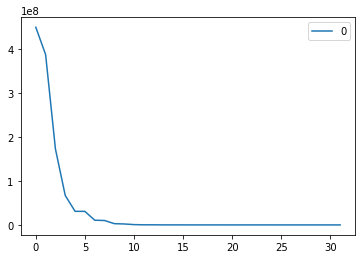

In [21]:
pd.DataFrame(model.loss_curve_).plot()


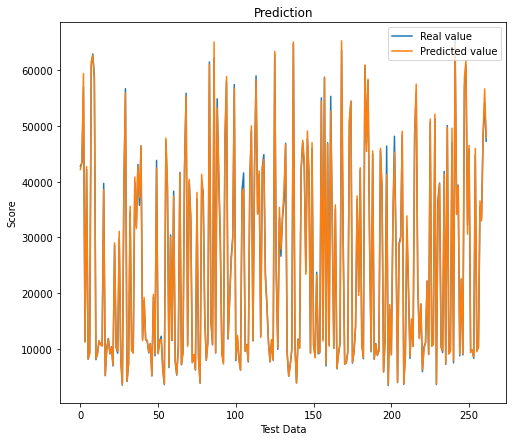

In [22]:

# visualize the predicted value with real value
plt.figure(figsize=(8, 7))

plt.plot(y_test, label='Real value')
plt.plot(y_predict, label='Predicted value')

plt.title('Prediction')
plt.xlabel('Test Data')
plt.ylabel('Score')
plt.legend()
plt.show()


# Random Forest Model

In [23]:
random = RandomForestRegressor(n_estimators=100)
random.fit(X_train, y_train)


/var/folders/h1/ty3jx1t936917lr2gd4qwrxr0000gn/T/ipykernel_8837/841801870.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(X_train, y_train)


RandomForestRegressor()

In [24]:
y_predict = model.predict(X_test)


In [25]:
y_predict_random = random.predict(X_test)

In [26]:
mae = metrics.mean_absolute_error(y_test, y_predict)
r2 = metrics.r2_score(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)
print("Accuracy score", model.score(X_test, y_test))

Mean Absolute Error:  460.56599121819494
Mean Squared Error:  624402.7891274857
R2 Score:  0.9981463457756473
Accuracy score 0.9981463457756473


In [27]:
mae = metrics.mean_absolute_error(y_test, y_predict_random)
r2 = metrics.r2_score(y_test, y_predict_random)
mse = metrics.mean_squared_error(y_test, y_predict_random)


print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)
print("Accuracy score", random.score(X_test, y_test))


Mean Absolute Error:  406.6849732824414
Mean Squared Error:  477175.23500932055
R2 Score:  0.9985834177785025
Accuracy score 0.9985834177785025


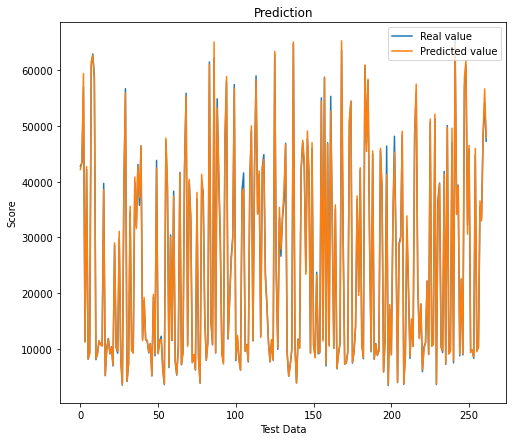

In [28]:

# visualize the predicted value with real value
plt.figure(figsize=(8, 7))

plt.plot(y_test, label='Real value')
plt.plot(y_predict, label='Predicted value')

plt.title('Prediction')
plt.xlabel('Test Data')
plt.ylabel('Score')
plt.legend()
plt.show()


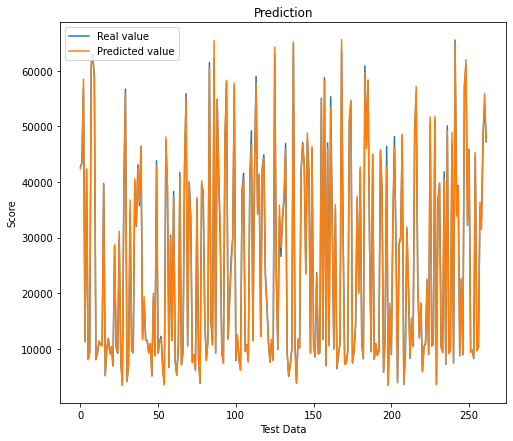

In [29]:

# visualize the predicted value with real value
plt.figure(figsize=(8, 7))

plt.plot(y_test, label='Real value')
plt.plot(y_predict_random, label='Predicted value')

plt.title('Prediction')
plt.xlabel('Test Data')
plt.ylabel('Score')
plt.legend()
plt.show()


# Decision Tree 

In [30]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(X_train, y_train)
DecisionTree_Prediction = model.predict(X_test)
my_datasets = pd.DataFrame(
    {"Decision_Prediction": DecisionTree_Prediction, "Actual Value": y_test.reshape(-1)})
print(my_datasets)


     Decision_Prediction Actual Value
0                41848.3      42733.2
1                43079.1      43448.0
2                61195.3      56955.3
3                11224.4      11333.4
4                42912.0      42209.3
..                   ...          ...
257              35662.5      35467.5
258              30095.0      33382.9
259              48994.5      48200.1
260              56405.4      54158.3
261              47666.9      47238.7

[262 rows x 2 columns]


In [31]:
from sklearn.metrics import r2_score
score = r2_score(y_test, DecisionTree_Prediction)
mae = metrics.mean_absolute_error(y_test, DecisionTree_Prediction)
print(score)
print("Accuracy", model.score(X_test, y_test))
print("MAE", mae)

0.9972292100179119
Accuracy 0.9972292100179119
MAE 576.2534351145038


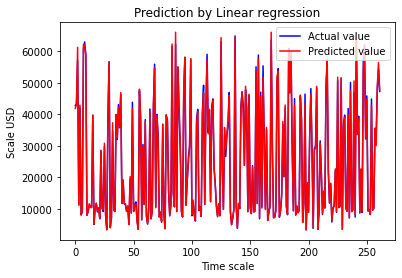

In [32]:
# Plot between predicted value and True value
plt.plot(y_test, label="Actual value", color="b")
plt.plot(DecisionTree_Prediction, label="Predicted value", color="r")
plt.title("Prediction by Linear regression")
plt.xlabel("Time scale")
plt.ylabel("Scale USD")
plt.legend()
plt.show()


# SVR 

In [33]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.svm import SVR
rbf_SVR = SVR(kernel='poly',  C=1000.0, degree=2).fit(X_train, y_train)
rbf_SVR_predicted = rbf_SVR.predict(X_test)
result3 = rbf_SVR.score(X_test, y_test)
print("The accuracy in RBF:", result3)
print("The R2 score in RBF:", r2_score(y_test, rbf_SVR_predicted))
print("MAE", metrics.mean_absolute_error(y_test, rbf_SVR_predicted))


The accuracy in RBF: 0.9217167532335337
The R2 score in RBF: 0.9217167532335337
MAE 3631.7357650738536


/Users/chhounsophanon/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


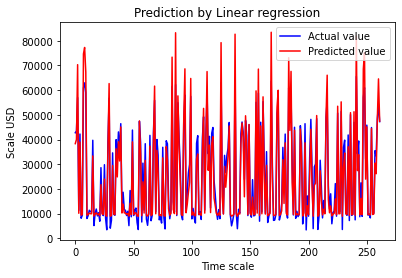

In [34]:
# Plot between predicted value and True value
plt.plot(y_test, label="Actual value", color="b")
plt.plot(rbf_SVR_predicted, label="Predicted value", color="r")
plt.title("Prediction by Linear regression")
plt.xlabel("Time scale")
plt.ylabel("Scale USD")
plt.legend()
plt.show()


# Linear Regression Model


In [35]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
model = linear_regression.fit(X_train, y_train)
# find intercept and slope ( coefficient )
Q_0 = model.intercept_
print(Q_0)

Q_1 = model.coef_
print(Q_1)


[3395.63518941]
[[-33282.16248592  58326.67717099  39314.95286775]]


In [36]:
Linear_prediction = model.predict(X_test)
print(Linear_prediction)


[[42413.74299343]
 [43345.28008474]
 [58181.56272887]
 [11270.96944313]
 [42013.53742966]
 [ 8078.45738909]
 [ 9351.31240616]
 [61016.07539022]
 [61708.81556201]
 [58779.9466562 ]
 [ 8132.08933363]
 [ 9115.13225627]
 [11170.44899806]
 [10704.03741777]
 [10630.98780505]
 [39552.59825596]
 [ 5137.66319414]
 [10125.4952254 ]
 [11770.34286192]
 [ 9054.50231493]
 [10481.19639569]
 [ 7052.18285956]
 [28652.20993151]
 [10207.29776376]
 [ 9588.94255055]
 [30305.58839301]
 [ 8015.98198431]
 [ 3458.13931657]
 [39460.7595672 ]
 [55679.13983953]
 [ 4096.3533716 ]
 [ 7297.07711353]
 [35637.58378042]
 [ 9769.27494583]
 [ 9287.10301558]
 [40292.03418652]
 [30365.24587332]
 [42690.43076164]
 [36195.09957168]
 [46874.98045684]
 [11630.61270663]
 [18920.32139407]
 [11620.78718496]
 [11329.63428619]
 [ 9239.65229321]
 [10944.30226299]
 [ 5102.86987351]
 [19526.28426182]
 [ 8961.61940464]
 [43546.57240345]
 [ 9927.85607702]
 [11313.5666253 ]
 [12116.04634768]
 [ 6394.34227172]
 [ 3569.44116097]
 [47485.11

In [37]:
Actual_value = y_test.reshape(-1)
Linear_prediction = Linear_prediction.reshape(-1)
my_datasets = pd.DataFrame(
    {"Linear_Prediction": Linear_prediction, "Actual Value": Actual_value})
print(my_datasets)


     Linear_Prediction Actual Value
0         42413.742993      42733.2
1         43345.280085      43448.0
2         58181.562729      56955.3
3         11270.969443      11333.4
4         42013.537430      42209.3
..                 ...          ...
257       35606.731935      35467.5
258       32329.280702      33382.9
259       48432.389086      48200.1
260       55747.212005      54158.3
261       47210.647572      47238.7

[262 rows x 2 columns]


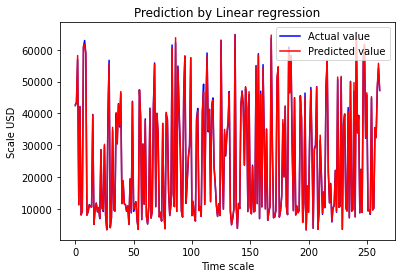

In [38]:
# Plot between predicted value and True value
plt.plot(y_test, label="Actual value", color="b")
plt.plot(Linear_prediction, label="Predicted value", color="r")
plt.title("Prediction by Linear regression")
plt.xlabel("Time scale")
plt.ylabel("Scale USD")
plt.legend()
plt.show()


In [39]:
from sklearn.metrics import accuracy_score, r2_score
result = model.score(X_test, y_test)
print("The accuracy between actual and predicted is:",result)
print("The R2 score is:",r2_score(y_test, Linear_prediction))
print("MAE", metrics.mean_absolute_error(y_test, Linear_prediction))

The accuracy between actual and predicted is: 0.9992587992521044
The R2 score is: 0.9992587992521044
MAE 291.6332625622345


In [40]:
pickle.dump(random, open("../models/model.pkl", "wb"))